In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

cricket = pd.read_csv('cricket.csv')
cricket.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0,0.0,0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0,0.0,0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63,33,190.90,0,...,0.0,0,0,0,0,0.0,0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0,0.0,0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0,0.0,0,0,0,0


In [46]:
new_cricket = cricket[['Mat.x','Inns.x','Runs.x','HS','BF','X100','X4s','X50','X6s','Runs.y']]

new_cricket

,Mat.x,Inns.x,Runs.x,HS,BF,X100,X4s,X50,X6s,Runs.y
0,10,9,134,46,100,0,6,0,8,0
1,12,11,480,90,275,0,39,6,30,0
2,3,3,63,46,33,0,3,0,5,0
3,15,14,370,65,313,0,39,1,5,0
4,6,6,148,45,118,0,13,0,6,0
...,...,...,...,...,...,...,...,...,...,...
138,0,0,0,0,0,0,0,0,0,547
139,0,0,0,0,0,0,0,0,0,466
140,0,0,0,0,0,0,0,0,0,418
141,0,0,0,0,0,0,0,0,0,65


In [47]:
CR = new_cricket.values
CR

array([[ 10,   9, 134, ...,   0,   8,   0],
       [ 12,  11, 480, ...,   6,  30,   0],
       [  3,   3,  63, ...,   0,   5,   0],
       ...,
       [  0,   0,   0, ...,   0,   0, 418],
       [  0,   0,   0, ...,   0,   0,  65],
       [  0,   0,   0, ...,   0,   0, 363]])

In [48]:
#Scale it, to normalize it. Also called Z-Score  
uni_norm = scale(CR)
uni_norm


array([[ 0.4480029 ,  0.54491687,  0.00943771, ..., -0.489542  ,
         0.22024911, -0.89620383],
       [ 0.77823185,  0.90989631,  1.98807763, ...,  3.66914149,
         2.73076982, -0.89620383],
       [-0.7077984 , -0.55002147, -0.39658378, ..., -0.489542  ,
        -0.12209462, -0.89620383],
       ...,
       [-1.20314182, -1.09749065, -0.75685636, ..., -0.489542  ,
        -0.69266751,  1.83360088],
       [-1.20314182, -1.09749065, -0.75685636, ..., -0.489542  ,
        -0.69266751, -0.47171267],
       [-1.20314182, -1.09749065, -0.75685636, ..., -0.489542  ,
        -0.69266751,  1.47441605]])

In [49]:
# can also give how many components we want to generate
pca = PCA(n_components= 7)
pca_values = pca.fit_transform(uni_norm)

In [50]:
#See the varian ratio, related to how many n_components we select. 
var = pca.explained_variance_ratio_
var

array([0.70600723, 0.10716681, 0.09489092, 0.04860857, 0.01789326,
       0.01145418, 0.00859255])

In [51]:
#Get cumulative variance
cum_var = np.cumsum(np.round(var, decimals=6) * 100)
cum_var

array([70.6007, 81.3174, 90.8065, 95.6674, 97.4567, 98.6021, 99.4614])

Above it tells us that 5 columns of PCA have 97 percent of the information. 

In [52]:
pca.components_

array([[ 2.95016675e-01,  3.42501679e-01,  3.71952917e-01,
         3.50283754e-01,  3.69140422e-01,  1.54449400e-01,
         3.58345077e-01,  3.27278419e-01,  3.48918956e-01,
        -1.31240300e-01],
       [ 4.21207514e-01,  1.94759737e-01, -3.57358873e-02,
        -5.80834068e-03, -5.08079899e-02,  1.43922692e-01,
        -6.75463345e-02, -1.81278881e-01,  4.53479876e-02,
         8.48861539e-01],
       [-3.00924890e-01, -2.36165671e-01,  7.86258937e-04,
         1.96726673e-02, -5.59881615e-02,  9.03008495e-01,
        -1.98818577e-02, -2.54526403e-02,  1.80963925e-01,
         3.05330953e-02],
       [-3.91449290e-01, -3.30256878e-01,  1.55556271e-01,
        -2.24582772e-01,  9.41144882e-02, -2.18731001e-01,
         2.43409593e-01,  5.75617211e-01,  9.33068819e-02,
         4.55051982e-01],
       [-1.07531681e-01, -1.33108284e-01, -1.29048635e-01,
         5.88569204e-01, -2.82616923e-01, -2.12753886e-01,
        -4.40417824e-01,  1.30048848e-01,  5.16892259e-01,
         6.

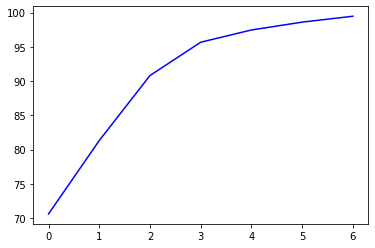

In [53]:
#Plot a variance plot for PCA components
plt.plot(cum_var, color ="blue")

In [54]:
pca_values[:,0:3]
#so these are two components of pca. 

array([[ 3.70842809e-01, -3.72852880e-01, -3.70935139e-01],
       [ 5.29930782e+00, -1.08951242e+00, -3.00466242e-01],
       [-8.86537532e-01, -1.03337819e+00,  2.08067920e-01],
       [ 3.11149492e+00, -2.64451824e-01, -1.04056046e+00],
       [ 1.33747809e-01, -8.06727746e-01, -1.01516879e-01],
       [ 7.05429544e+00,  2.85414883e-01,  3.48486446e+00],
       [ 3.11834517e+00,  2.06391672e+00, -3.75983093e-01],
       [-1.00534962e+00,  2.38629442e+00, -5.68290906e-01],
       [-6.58259680e-01,  7.51134550e-01, -3.16136567e-01],
       [-3.40022365e-01,  4.13566797e-01, -1.43371792e-01],
       [ 8.87076051e-01,  1.58057196e+00, -7.10461677e-01],
       [-1.51869359e+00,  1.59730106e+00, -3.28857596e-01],
       [ 3.92764278e-02, -8.01527552e-01, -9.24164266e-02],
       [-7.40755900e-01, -3.91814409e-01,  1.89562154e-01],
       [ 4.80873117e+00, -7.22621076e-02,  3.90318436e+00],
       [ 5.17586908e+00, -4.30314067e-01, -9.87363014e-01],
       [-1.28396316e+00, -1.41173053e-01

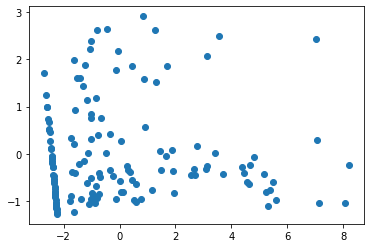

In [55]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]

plt.scatter(x,y) # So this is PC1 and PC2

In [57]:
pca_df = pd.concat([pd.DataFrame(pca_values[:,0:4], columns=["pc1","pc2","pc3","pc4"]), cricket[['PLAYER']]], axis=1)

pca_df

,pc1,pc2,pc3,pc4,PLAYER
0,0.370843,-0.372853,-0.370935,-1.154426,Aaron Finch
1,5.299308,-1.089512,-0.300466,1.841344,AB de Villiers
2,-0.886538,-1.033378,0.208068,-0.531949,Abhishek Sharma
3,3.111495,-0.264452,-1.040560,-0.686174,Ajinkya Rahane
4,0.133748,-0.806728,-0.101517,-0.600394,Alex Hales
...,...,...,...,...,...
138,-2.694079,1.705253,0.482549,1.613545,Siddarth Kaul
139,-2.624655,1.256221,0.466398,1.372831,Trent Boult
140,-2.583515,0.990128,0.456827,1.230185,Umesh Yadav
141,-2.280965,-0.966764,0.386438,0.181148,Vi0y Kumar


In [ ]:
#taking just the first three pca columns 
only_pca_cols = pca_df[["pc1","pc2","pc3"]]
only_pca_cols

,pc1,pc2,pc3
0,0.370843,-0.372853,-0.370935
1,5.299308,-1.089512,-0.300466
2,-0.886538,-1.033378,0.208068
3,3.111495,-0.264452,-1.040560
4,0.133748,-0.806728,-0.101517
...,...,...,...
138,-2.694079,1.705253,0.482549
139,-2.624655,1.256221,0.466398
140,-2.583515,0.990128,0.456827
141,-2.280965,-0.966764,0.386438


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [21.25, 21.25, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [95.0, 95.0, 120.0, 120.0],
  [45.625, 45.625, 107.5, 107.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [201.25, 201.25, 242.5, 242.5],
  [170.0, 170.0, 221.875, 221.875],
  [155.0, 155.0, 195.9375, 195.9375],
  [145.0, 145.0, 175.46875, 175.46875],
  [76.5625, 76.5625, 160.234375, 160.234375],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [312.5, 312.5, 340.0, 340.0],
  [295.0, 295.0, 326.25, 326

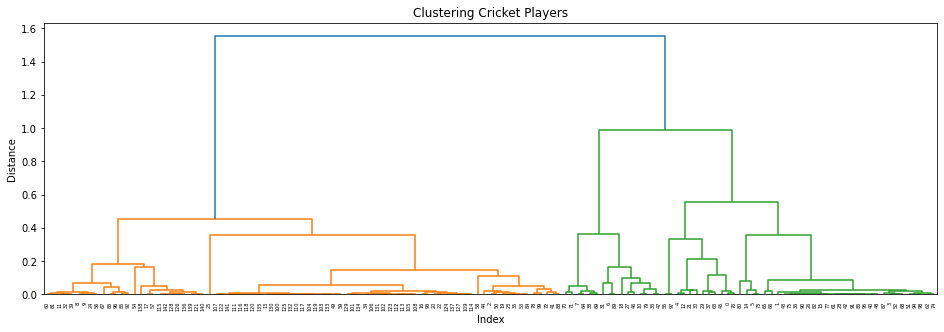

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
X = linkage(only_pca_cols, method='average', metric='cosine')
plt.figure(figsize=(16,5))
plt.title("Clustering Cricket Players")
plt.xlabel('Index')
plt.ylabel("Distance")
plt.xticks(rotation = 90)
sch.dendrogram(X)

In [ ]:
# going to go with 5 clusters
from sklearn.cluster import AgglomerativeClustering

H = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean').fit(only_pca_cols)

H_labels = pd.Series(H.labels_)
pca_df['cluster_label'] = H_labels

In [ ]:
player_cluster = pd.DataFrame(pca_df['PLAYER'])

player_cluster['Group they belong to'] = H_labels

player_cluster

,PLAYER,Group they belong to
0,Aaron Finch,2
1,AB de Villiers,1
2,Abhishek Sharma,4
3,Ajinkya Rahane,3
4,Alex Hales,2
...,...,...
138,Siddarth Kaul,4
139,Trent Boult,4
140,Umesh Yadav,4
141,Vi0y Kumar,4


Without PCA

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [20.0, 20.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [90.0, 90.0, 112.5, 112.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [101.25, 101.25, 143.75, 143.75],
  [75.0, 75.0, 122.5, 122.5],
  [65.0, 65.0, 98.75, 98.75],
  [35.0, 35.0, 81.875, 81.875],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [250.0, 250.0, 273.75, 273.75],
  [230.0, 230.0, 261.875, 261.875],
  [191.25, 191.25, 245.9375, 245.9375],
  [305.0, 305.0, 315.0, 315.0],
  [218.59375, 218.59375, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [3

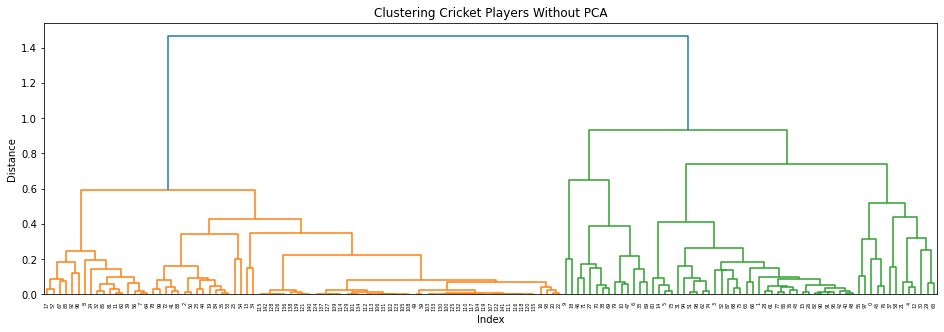

In [ ]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
X = linkage(uni_norm, method='average', metric='cosine')
plt.figure(figsize=(16,5))
plt.title("Clustering Cricket Players Without PCA")
plt.xlabel('Index')
plt.ylabel("Distance")
plt.xticks(rotation = 90)
sch.dendrogram(X)

Getting about 8-10 clusters here. So I thing pca works best as it bring down the number of clusters. 

In [ ]:
# going to go with 5 clusters
from sklearn.cluster import AgglomerativeClustering

B = AgglomerativeClustering(n_clusters=10, linkage='complete', affinity='euclidean').fit(uni_norm)

B_labels = pd.Series(B.labels_)

player_groups_without_pca = pd.DataFrame(pca_df['PLAYER'])

player_groups_without_pca['Player Groups'] = B_labels
player_groups_without_pca


,PLAYER,Player Groups
0,Aaron Finch,2
1,AB de Villiers,3
2,Abhishek Sharma,2
3,Ajinkya Rahane,4
4,Alex Hales,2
...,...,...
138,Siddarth Kaul,1
139,Trent Boult,1
140,Umesh Yadav,1
141,Vi0y Kumar,2
